# 2.1 Images

Importing necessary libraries

In [1]:
import torch
from torchvision import datasets, transforms
from einops import rearrange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import random

Download the MNIST dataset using the torchvision library and create a subset of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class (number).

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)

# Step 2: Create a subset of 1000 samples
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Select the first 1000 samples
images_subset = images[:1000]
labels_subset = labels[:1000]

Plot a histogram of classes in the subset

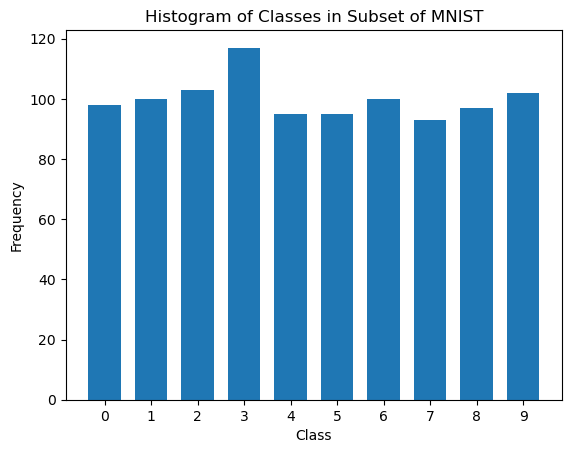

In [3]:
plt.hist(labels_subset.numpy(), bins=np.arange(-0.5, 10, 1), rwidth=0.7)
plt.title("Histogram of Classes in Subset of MNIST")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 10, 1))
plt.show()

Batch the subset of MNIST images using einops

In [4]:
images_subset_reshaped = rearrange(images_subset, '(b batch) c h w -> b batch c h w', batch=25)

Randomly select an MNIST image sample and, using matplotlib, plot it in three dimensions. The x and y-axis’ should be the respective pixel locations, and the z-axis should be the pixel intensity.

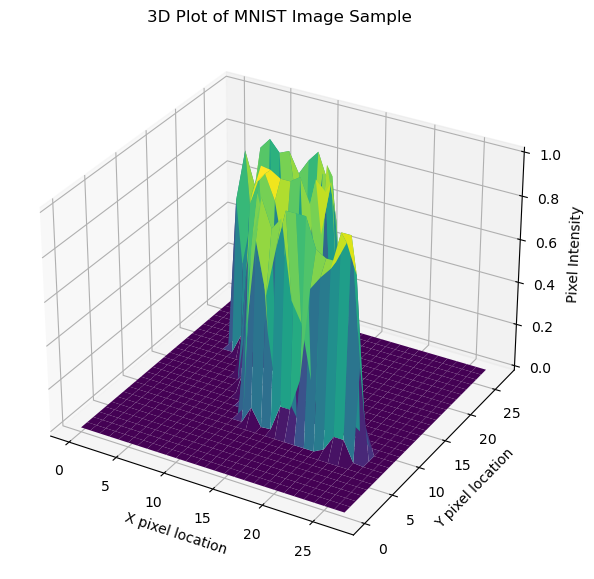

In [5]:
idx = random.randint(0, images_subset.shape[0] - 1)
image = images_subset[idx].squeeze()  # Remove channel dim if exists, for grayscale images

# Create a grid of x, y coordinates
x = np.arange(0, image.shape[1], 1)
y = np.arange(0, image.shape[0], 1)
x, y = np.meshgrid(x, y)

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Pixel intensity as z-axis
z = image.numpy()

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('3D Plot of MNIST Image Sample')
ax.set_xlabel('X pixel location')
ax.set_ylabel('Y pixel location')
ax.set_zlabel('Pixel Intensity')

plt.show()

# 2.2 Time Series  

In [19]:
data = pd.read_csv('energydata_complete.csv', parse_dates=['date'], index_col='date')

Plot the appliances energy consumption for whole period and a closer look at any
one week of consumption.

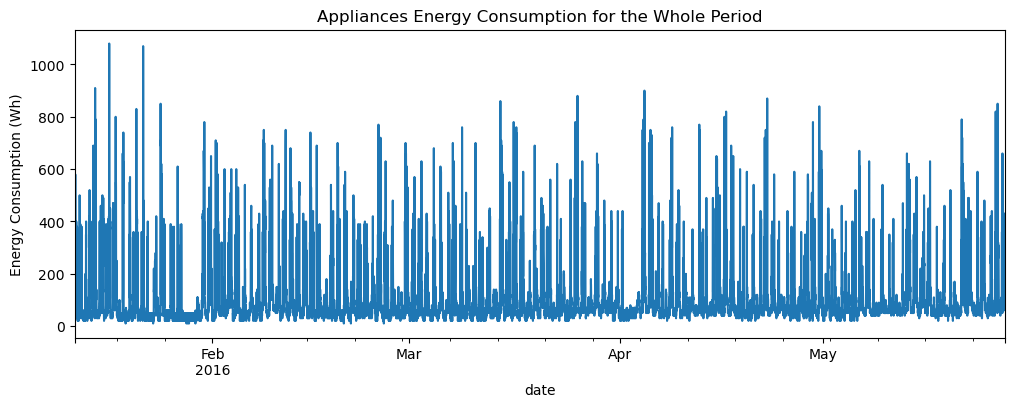

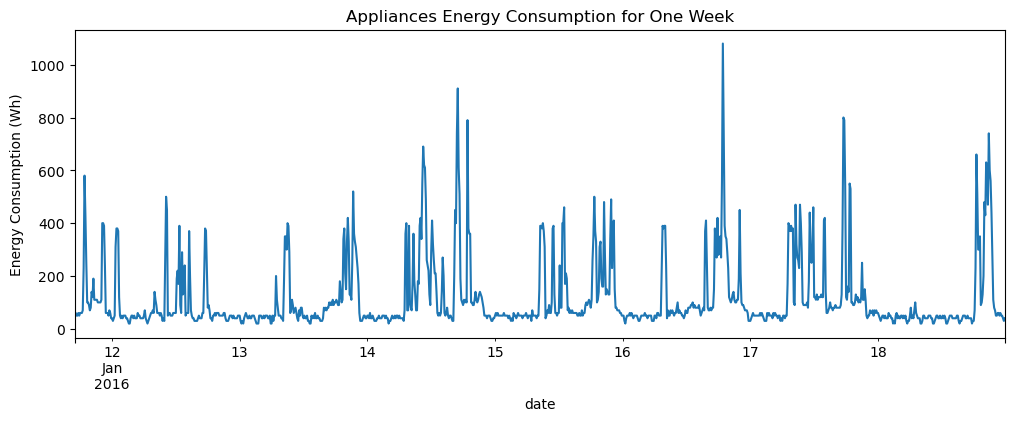

In [20]:
data['Appliances'].plot(figsize=(12, 4))
plt.title('Appliances Energy Consumption for the Whole Period')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

# Closer look at one week
data['Appliances']['2016-01-11':'2016-01-18'].plot(figsize=(12, 4))  # Example week
plt.title('Appliances Energy Consumption for One Week')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

Plot heatmap of hourly consumption of appliances for a week

2016-04-07 02:30:00


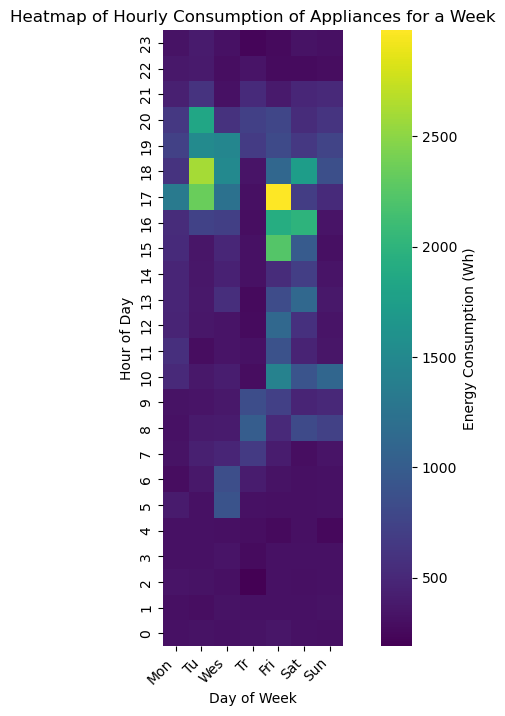

In [25]:
# Resample data to hourly for a week and unstack to get hours as columns
max_start_idx = len(data)-8
random_idx = random.randint(0, max_start_idx)
random_start_date = data.index[random_idx]

print(data.index[random_idx])

# Calculate 7 days from the random start date
random_end_date = random_start_date + pd.Timedelta(days=7)

# Resample data to hourly for the selected week
weekly_data = data.loc[random_start_date:random_end_date].resample('H').sum()

# We need to add a column for the day of the week, with Monday=0, Sunday=6
weekly_data['day_of_week'] = weekly_data.index.dayofweek
weekly_data['hour_of_day'] = weekly_data.index.hour

heatmap_data = weekly_data.pivot_table(index='hour_of_day', columns='day_of_week', values='Appliances', aggfunc='mean')

# Rename the columns from day numbers to day names for clarity
days = ['Mon', 'Tu', 'Wes', 'Tr', 'Fri', 'Sat', 'Sun']
heatmap_data.columns = days

plt.figure(figsize=(10, 8))  
sns.heatmap(heatmap_data, cmap='viridis', annot=False, cbar_kws={'label': 'Energy Consumption (Wh)'}, square=True)

plt.xticks(rotation=45, ha='right')
plt.title('Heatmap of Hourly Consumption of Appliances for a Week')
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.gca().invert_yaxis()
plt.show()

Plot the histogram of energy consumption of appliances

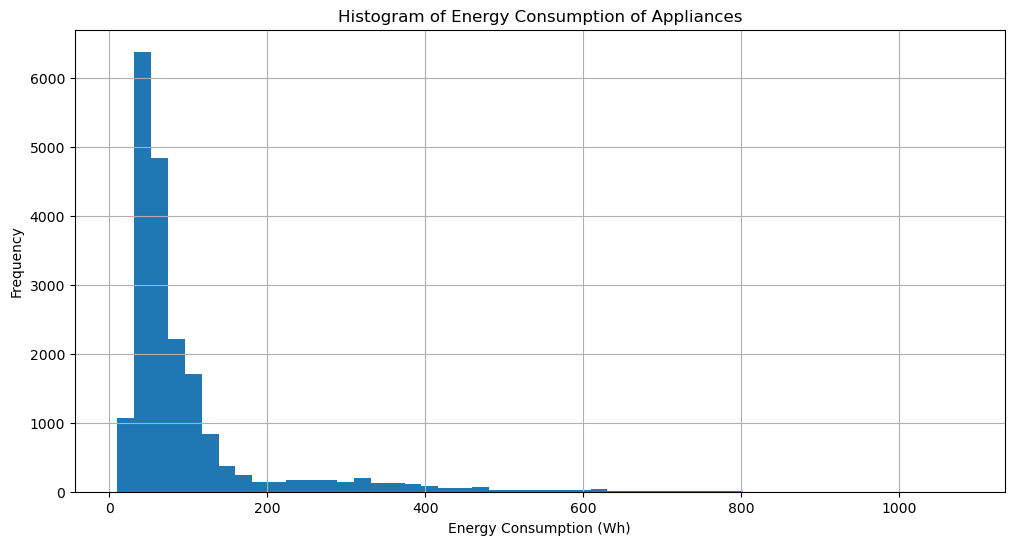

In [9]:
data['Appliances'].hist(bins=50, figsize=(12, 6))
plt.title('Histogram of Energy Consumption of Appliances')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM

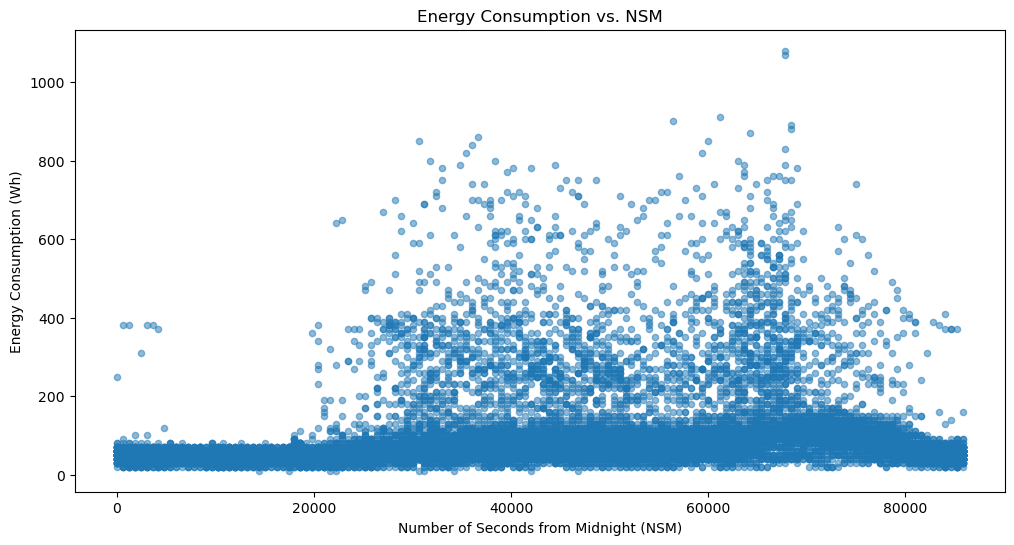

In [10]:
data['NSM'] = data.index.hour * 3600 + data.index.minute * 60 + data.index.second
data.plot.scatter(x='NSM', y='Appliances', figsize=(12, 6), alpha=0.5)
plt.title('Energy Consumption vs. NSM')
plt.xlabel('Number of Seconds from Midnight (NSM)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

Plot appliances energy consumption vs. Press mm Hg

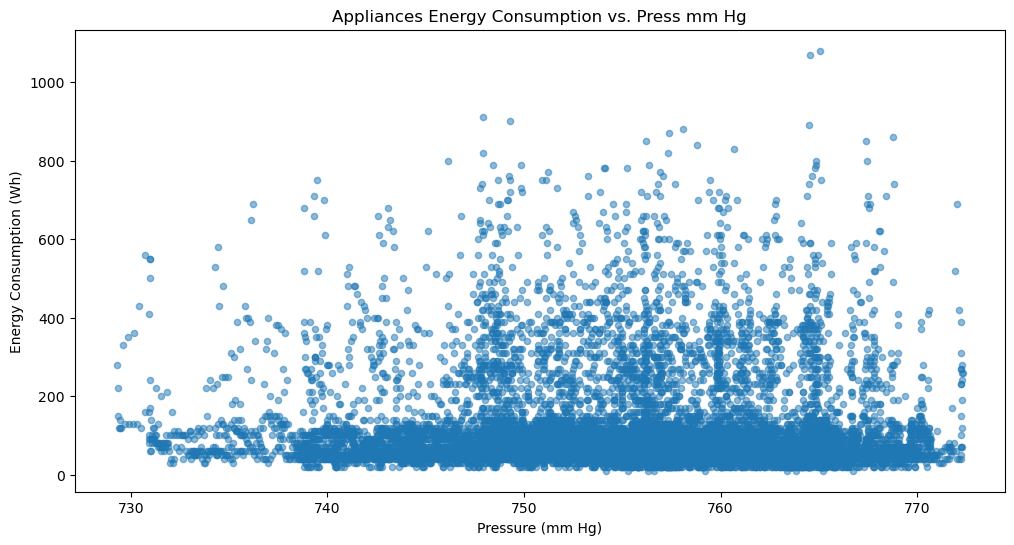

In [11]:
data.plot.scatter(x='Press_mm_hg', y='Appliances', figsize=(12, 6), alpha=0.5)
plt.title('Appliances Energy Consumption vs. Press mm Hg')
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

From the NSM plot, we see a surge of consumption at around 11:00 and 19:00. 
From the Pressure plot, we see many of the points lie within 10 mm Hg from 760 mm Hg.

# 2.3 Multi-variate

In [12]:
column_names = ['Frequency', 'Angle_of_attack', 'Chord_length', 
                'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']

# Load the dataset assuming it's whitespace-separated and has no header
data = pd.read_csv("airfoil_self_noise.dat", sep='\t', names=column_names)

# Compute the descriptive statistics
mean = data.mean()
variance = data.var()
std_dev = data.std()
median = data.median()
kurtosis = data.kurtosis()
skewness = data.skew()
data_range = data.max() - data.min()

# Create a DataFrame to display statistics nicely
stats_df = pd.DataFrame({
    'Mean': mean,
    'Variance': variance,
    'Standard Deviation': std_dev,
    'Median': median,
    'Kurtosis': kurtosis,
    'Skewness': skewness,
    'Range': data_range
})

print(stats_df)

                                            Mean      Variance  \
Frequency                            2886.380572  9.938717e+06   
Angle_of_attack                         6.782302  3.502424e+01   
Chord_length                            0.136548  8.749868e-03   
Free_stream_velocity                   50.860745  2.425116e+02   
Suction_side_displacement_thickness     0.011140  1.729287e-04   
Scaled_sound_pressure_level           124.835943  4.759146e+01   

                                     Standard Deviation       Median  \
Frequency                                   3152.573137  1600.000000   
Angle_of_attack                                5.918128     5.400000   
Chord_length                                   0.093541     0.101600   
Free_stream_velocity                          15.572784    39.600000   
Suction_side_displacement_thickness            0.013150     0.004957   
Scaled_sound_pressure_level                    6.898657   125.721000   

                                